<a href="https://colab.research.google.com/github/nattzza/AutoML-Data-Challenge/blob/main/KaggleDataChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Challenge - 

In [ ]:
# !pip install pycaret

In [ ]:
# !pip install interpret

In [ ]:
!pip install -U scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

## Load Data

In [ ]:
google_drive_path = "/content/drive/MyDrive/0_data/data_challenge" # Ruben's path
# google_drive_path = "/content/drive/MyDrive/ML Challenge Data" # Nat's path
X_train_name = "/features_train.csv"
y_train_name = "/target_train.csv"
X_test_name = "/features_test.csv"

In [ ]:
y_train = pd.read_csv(google_drive_path + y_train_name, index_col="Id").reset_index(drop=True)
X_train = pd.read_csv(google_drive_path + X_train_name, index_col="Id").reset_index(drop=True)
X_test = pd.read_csv(google_drive_path + X_test_name, index_col="Id").reset_index(drop=True)

y_train.shape, X_train.shape, X_test.shape

((10000, 1), (10000, 120), (20000, 120))

## Check Data

In [ ]:
# Check columns, data types and nulls
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119
count,1.000000e+04,10000.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.000206e+00,1.653294,1.323895e+01,1.631063,1.004520e+00,1.011949e+00,0.520059,1.657632,-0.002513,1.671704,1.640184,0.018512,-0.045882,1.017392e+00,0.013475,0.080780,1.675241,9.969287e-01,1.622195,0.004442,0.044056,0.497931,9.959264e-01,9.931424e-01,0.218314,1.650296,1.003019e+00,0.502293,1.020662e+00,9.963078e-01,-0.010737,-0.018190,9.811721e-01,1.659255,9.588271e+00,0.013961,0.197767,-0.052100,0.023322,-0.003413,9.812904e-01,1.640524,-0.010332,1.005863e+00,0.498120,1.014192e+00,0.288230,-0.008245,9.964474e-01,0.494105,194.853540,1.661364,9.997053e-01,1.234853e+01,-0.007583,1.010782e+00,-0.009086,1.627436,-0.036998,0.081146,2.316195e+01,1.628473e+01,1.322092e+01,99.450872,1.655163,0.013052,0.498765,1.658983,1.010099e+00,-0.005641,1.605911,1.645617,-0.019336,1.666654,144.332411,0.499315,1.635596,-0.053178,0.111660,1.640480,0.497234,1.669451,1.671225,1.645538,-0.039436,-0.079400,-0.027733,9.615469e+00,1.624225,9.831501e-01,0.004652,0.004133,9.942250e-01,0.086753,1.009154e+00,1.006046e+00,0.012977,1.658463,0.031468,1.633233,1.012985e+00,9.979990e-01,1.637923,0.025615,1.003058e+00,-0.098800,-0.010113,0.033083,-0.000504,1.647964,1.648705,0.497571,0.493227,1.635187,-0.000071,-0.026737,0.013010,1.620603,0.503886,1.667950
std,1.423822e+00,2.278088,1.870323e+01,2.040002,1.409997e+00,1.444751e+00,31.791384,2.116264,10.060025,2.251833,2.284041,3.680990,9.965037,1.429418e+00,9.969148,9.985038,2.222561,1.393660e+00,1.997111,1.002927,3.528149,0.288471,1.419872e+00,1.402773e+00,3.128920,2.067439,1.418846e+00,0.287762,1.465837e+00,1.415373e+00,9.929344,1.003334,1.381074e+00,2.226487,1.366015e+01,1.004743,9.987079,3.183651,0.992356,0.985365,1.393748e+00,2.154206,3.344346,1.428224e+00,0.287321,1.425512e+00,9.919275,10.062269,1.434598e+00,0.289343,413.031326,2.197502,1.421261e+00,1.774966e+01,0.986369,1.438813e+00,9.968585,2.215761,9.926077,10.056193,4.471562e+01,3.854573e+01,1.976919e+01,136.302674,2.279996,1.002271,0.287708,2.186941,1.460194e+00,1.005116,2.039193,2.088081,3.746007,2.154270,360.580276,0.287117,2.066005,10.019149,9.936498,2

In [ ]:
# Check class imbalance
y_train["Expected"].value_counts()

2    3365
0    3341
1    3294
Name: Expected, dtype: int64

## Data prep - Numeric features

In [ ]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119
count,1.000000e+04,10000.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.000206e+00,1.653294,1.323895e+01,1.631063,1.004520e+00,1.011949e+00,0.520059,1.657632,-0.002513,1.671704,1.640184,0.018512,-0.045882,1.017392e+00,0.013475,0.080780,1.675241,9.969287e-01,1.622195,0.004442,0.044056,0.497931,9.959264e-01,9.931424e-01,0.218314,1.650296,1.003019e+00,0.502293,1.020662e+00,9.963078e-01,-0.010737,-0.018190,9.811721e-01,1.659255,9.588271e+00,0.013961,0.197767,-0.052100,0.023322,-0.003413,...,0.497234,1.669451,1.671225,1.645538,-0.039436,-0.079400,-0.027733,9.615469e+00,1.624225,9.831501e-01,0.004652,0.004133,9.942250e-01,0.086753,1.009154e+00,1.006046e+00,0.012977,1.658463,0.031468,1.633233,1.012985e+00,9.979990e-01,1.637923,0.025615,1.003058e+00,-0.098800,-0.010113,0.033083,-0.000504,1.647964,1.648705,0.497571,0.493227,1.635187,-0.000071,-0.026737,0.013010,1.620603,0.503886,1.667950
std,1.423822e+00,2.278088,1.870323e+01,2.040002,1.409997e+00,1.444751e+00,31.791384,2.116264,10.060025,2.251833,2.284041,3.680990,9.965037,1.429418e+00,9.969148,9.985038,2.222561,1.393660e+00,1.997111,1.002927,3.528149,0.288471,1.419872e+00,1.402773e+00,3.128920,2.067439,1.418846e+00,0.287762,1.465837e+00,1.415373e+00,9.929344,1.003334,1.381074e+00,2.226487,1.366015e+01,1.004743,9.987079,3.183651,0.992356,0.985365,...,0.287562,2.437585,2.226468,2.173891,9.871263,9.893477,3.405446,1.460689e+01,1.982281,1.380745e+00,0.989621,1.008432,1.420748e+00,9.965041,1.459089e+00,1.401479e+00,0.985100,2.074236,3.231366,1.977157,1.455476e+00,1.402316e+00,2.080050,0.989372,1.410221e+00,10.137330,0.993343,10.063717,1.008250,2.056929,2.188790,0.285955,0.290153,1.975617,0.997596,10.082855,9.968787,2.117979,0.285662,2.203032
min,1.282517e-08,0.024358,7.274511e-07,0.020518,3.379589e-11,1.348884e-07,-129.141171,0.019514,-37.427526,0.028163,0.028149,-14.056768,-36.008848,1.149819e-08,-38.529038,-36.690956,0.014462,8.918739e-09,0.022663,-3.810056,-13.921941,0.000017,2.141147e-09,2.526926e-09,-12.793088,0.019895,7.656300e-08,0.000066,1.013105e-08,1.332685e-07,-36.512220,-3.904443,5.575404e-09,0.035186,8.202144e-09,-4.085987,-36.310761,-11.866657,-3.934659,-4.055037,...,0.000069,0.020156,0.025924,0.014790,-39.738974,-34.243676,-14.481581,6.991405e-07,0.030373,2.364365e-08,-4.418794,-4.365723,8.306068e-09,-35.568307,9.581974e-08,2.321680e-09,-3.515773,0.014322,-16.112369,0.025260,5.561252e-10,4.357064e-09,0.018291,-3.926843,2.255416e-08,-40.440318,-3.666281,-38.750532,-3.926450,0.025084,0.022037,0.000128,0.000217,0.016691,-3.885360,-34.580159,-40.925480,0.016396,0.000139,0.029379
25%,1.040056e-01,0.509503,1.318718e+00,0.512428,1.042731e-01,1.005381e-01,-21.037225,0.507242,-6.698098,0.512798,0.502079,-2.405063,-6.627612,1.003465e-01,-6.629514,-6.614758,0.507513,1.

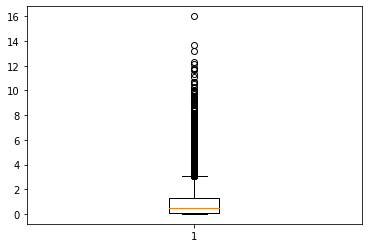

In [ ]:
# Check the boxplto for the first feature
fig, ax = plt.subplots()

ax.boxplot(X_train["0"]);

In [ ]:
# Check for outliers
outliers_col = {}

for col_name in X_train.columns.to_list():
  
  Q1 = X_train[col_name].quantile(0.02) # Q1 for outliers
  Q3 = X_train[col_name].quantile(0.98) # Q3 for outliers
  IQR = Q3 - Q1

  outliers = X_train[(X_train[col_name] < Q1 - 1.5 * IQR) | (X_train[col_name] > Q3 + 1.5 * IQR)].index.to_list()

  outliers_col[col_name] = outliers

In [ ]:
# List of lists with outliers based on the criteria above
outliers_col.values()

dict_values([[3635, 9510], [54, 941, 2684, 2851, 2984, 3096, 3496, 4204, 4617, 5997, 6473, 6950, 7248, 7624, 7949, 8660, 9935], [3093, 8657], [233, 242, 283, 837, 1615, 1683, 4343, 5854, 7242, 7837, 8259, 8384, 8956], [1780, 3272, 6036, 6676], [829, 1430, 1594, 1932, 2346, 6629, 6768], [], [308, 474, 913, 4368, 5666, 5725, 5887, 6328, 8634, 9227], [], [430, 832, 1062, 1497, 1890, 2349, 3528, 4235, 4284, 4540, 8756, 8917, 9211, 9467, 9551, 9698, 9800, 9931], [228, 344, 420, 432, 874, 1242, 1881, 2806, 3789, 4601, 5182, 6638, 6763, 7585, 7781, 8141, 8170, 8207, 9869, 9901], [], [], [1925, 9532], [], [], [1660, 2390, 2414, 2686, 4104, 4320, 4781, 4828, 5107, 7257, 8844, 9474, 9555], [7032], [239, 550, 1295, 4516, 6260, 6985, 7107, 7596], [], [], [], [41, 8429, 9487], [9887], [], [341, 886, 1580, 2125, 2380, 4233, 6162, 6931, 7708, 8159, 9296], [3750, 4717, 7676], [], [2566, 4049, 4648], [6959], [], [], [1017, 4729], [936, 1647, 1949, 2651, 3139, 4343, 4492, 4950, 6454, 6731, 6937, 6955, 7

In [ ]:
# Unpack the list of lists to check unique outliers
outliers_list = []

for values_dict in outliers_col.values():
  for value in values_dict:
    outliers_list.append(value)

In [ ]:
# indexes of the outliers
outliers_list = list(set(outliers_list))
len(outliers_list)

531

## Model data prep

In [ ]:
# Split data in training and validation from the training data

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.20)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_train.shape)
print("y_train shape:", X_train.shape)
print("y_test shape:", X_train.shape)

X_train shape: (8000, 120)
X_test shape: (8000, 120)
y_train shape: (8000, 120)
y_test shape: (8000, 120)


# Low Code ML

In [ ]:
# Initialize set up
from pycaret.classification import *

reg = setup(data=pd.concat([X_train, y_train], axis=1), 
            target = 'Expected', 
            session_id=13, 
            log_experiment=True, 
            experiment_name='data_challenge_1')

In [ ]:
# Baseline performance
best_model = compare_models(fold=5)

# Box Cox transform

In [ ]:
from scipy import stats

# Applying box cox transformation to all the columns
for col in X_train.columns.to_list():

  if min(X_train[col]) > 0:

    original_data = X_train[col]
    fitted_data, fitted_lambda = stats.boxcox(original_data)

    X_train[col] = fitted_data

In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119
0,0.914157,-0.809264,2.398885,0.459579,1.240744,0.329545,29.897623,1.057679,-8.641869,-0.886843,0.690310,2.280097,5.906375,-1.564367,-5.641568,12.399412,1.619380,0.658871,-0.741799,0.510913,-1.015441,-0.966342,0.416531,-1.985639,-4.479576,0.645858,-0.731736,-0.569067,0.236241,-2.499824,5.292789,0.118012,0.439914,0.267770,4.493394,0.889536,-2.184300,-3.434408,-0.187053,-0.315984,-1.276202,1.455581,-6.725756,0.961165,-0.318493,0.473218,-4.573363,14.639874,-3.085103,-0.477609,-2.604424,0.766110,-0.457036,4.569156,0.400550,-1.041204,-4.301298,0.018383,4.917396,-0.419137,4.453817,-0.752110,3.716498,3.200165,-0.920947,0.889179,-0.570300,-0.530833,-1.862546,1.201149,0.871112,-0.651370,-0.472142,0.072610,1.671573,-0.076629,0.596277,31.748331,1.108078,-0.511113,-1.190129,0.558059,0.114693,-0.438941,-4.458461,16.767320,-0.315395,0.667084,0.774551,-1.593736,0.641523,-1.486565,-2.463605,0.894450,-0.089953,-2.258032,-1.276655,-0.259570,2.038736,0.690659,-3.251266,-0.640888,-0.473948,1.049451,-4.008427,-22.219764,-0.058046,1.166972,-1.117488,-0.010099,-0.441860,-0.307460,-0.002481,0.239602,0.109460,2.829606,-8.292344,0.353994,-1.137222,0.693044
1,-0.514789,-1.611559,4.339494,-0.733603,-1.465090,-1.792042,-28.162402,1.678179,-9.188298,0.184786,1.517971,-5.775092,-6.516740,0.003518,13.381746,-3.584999,-0.872808,1.206139,-2.605521,-1.377308,-2.875074,-0.482794,-0.922521,1.532398,0.764284,0.065841,-3.304808,-1.267139,-0.724294,0.151817,2.548486,0.083868,-0.783922,1.572307,2.108230,-0.556860,-12.565164,4.490605,-0.204060,0.249571,-1.199903,0.673537,-2.306467,-0.396120,-1.101334,-0.718950,-8.122354,-1.736797,-2.325913,-0.409675,3.970473,0.388309,-0.842323,4.518161,-0.350295,-0.396798,1.461922,0.156561,2.514328,4.851981,-2.130271,-4.515039,1.792704,0.581581,1.228936,0.790520,-0.636941,1.013307,-0.243411,-0.167342,1.613405,0.945093,2.106962,0.458916,-0.405797,-0.029956,-0.258975,7.767439,-23.645256,-0.236897,-0.224625,0.215463,0.738318,0.830684,-12.537208,-5.961822,-1.230639,2.379818,-1.345379,0.873838,0.895187,-1.304038,-3.064250,-15.059307,0.109430,-0.589076,-0.011918,-0.067511,0.413158,0.664632,-0.343942,-1.405811,-0.898484,-1.817962,-1.193721,10.887651,2.367816,-11.312185,0.416286,-0.736353,0.676407,-0.766002,-0.615698,-1.345476,-1.131653,-0.908362,20.468617,0.137119,-1.043420,-0.991410
2,-2.323585,-0.443528,0.536925,-0.001604,0.238901,-0.236784,-22.016388,0.413505,-3.526049,-1.752031,0.313452,-5.828967,14.266635,-1.691854,13.647478,12.043413,-1.499838,-0.100803,-0.218135,-0.132633,4.494041,-0.017749,-1.377424,-3.582474,0.950084,-0.157297,-2.839256,-0.658911,-2.291610,-0.954050,9.463682,0.034303,-0.235481,-0.120437,4.126821,0.698729,6.481368,-3.971667,-0.667759,-0.154754,-3.645330,0.327404,4.533684,-3.671444,-0.537239,1.718304,6.873592,13.212119,0.847793,-0.525890,-2.084560,-0.196431,0.285734,4.076219,-0.842762,-1.079798,-5.198876,0.101647,1.118650,6.204435,0.215142,-1.063856,7.347019,0.231654,0.000490,-0.213792,-0.934286,0.005848,0.785358,0.401574,0.389127,1.046585,-7.420275,0.544926,4.813295,-0.015166,-0.516167,14.169331,2.597736,1.435593,-0.867305,-0.195053,-0.838764,-0.326782,-8.987762,-7.022517,6.344787,-1.650714,-0.072928,-0.067910,1.975385,-0.773477,1.343424,4.053084,1.528880,-1.789684,0.693894,-1.392438,3.701254,-0.600478,-2.733697,-0.063904,-1.976225,0.516001,-2.386210,-5.912876,0.240362,4.619169,-0.910393,2.290356,-0.107792,-0.416210,-1.048070,1.757350,0.358590,-8.164399,0.596139,-0.647189,-0.172061,1.435896
3,-2.135084,0.342474,7.496245,0.992611,-0.418564,-0.330524,12.132919,0.473317,-0.782570,1.138094,2.085336,-4.796236,4.220389,-2.903145,1.968096,1.924126,-1.058611,-1

In [ ]:
# Select columns
# X_train = X_train[["24", "11", "98", "60", "37", "87", "72", "6", "74", "50", "42", "61", "20", "86", "49"]]

In [ ]:
# Check performance after the box cox transformation
from pycaret.classification import *

reg = setup(data=pd.concat([X_train, y_train], axis=1), 
            target = 'Expected', 
            session_id=13, 
            log_experiment=True, 
            experiment_name='data_challenge_2')

In [ ]:
# Baseline models after box cox transformation
best_model = compare_models()

IntProgress(value=0, description='Processing: ', max=69)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:52:29
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Models
Estimator,. . . . . . . . . . . . . . . . . .,Quadratic Discriminant Analysis


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.6660,0.8397,0.6662,0.6666,0.6659,0.4989,0.4992,0.027
lightgbm,Light Gradient Boosting Machine,0.6418,0.8191,0.6421,0.6423,0.6417,0.4628,0.4630,0.725
et,Extra Trees Classifier,0.6319,0.8083,0.6323,0.6324,0.6314,0.4480,0.4486,0.990
rf,Random Forest Classifier,0.6294,0.8053,0.6296,0.6305,0.6293,0.4441,0.4446,1.784
gbc,Gradient Boosting Classifier,0.5602,0.7500,0.5607,0.5622,0.5594,0.3406,0.3417,7.241
knn,K Neighbors Classifier,0.5482,0.7327,0.5495,0.5579,0.5413,0.3232,0.3298,0.154
nb,Naive Bayes,0.4884,0.6809,0.4890,0.4881,0.4859,0.2330,0.2341,0.025
lr,Logistic Regression,0.4824,0.6672,0.4828,0.4822,0.4815,0.2237,0.2241,0.259
lda,Linear Discriminant Analysis,0.4816,0.6672,0.4821,0.4816,0.4808,0.2227,0.2230,0.037
ridge,Ridge Classifier,0.4812,0.0000,0.4817,0.4812,0.4796,0.2222,0.2229,0.023


AttributeError: ignored

# Tune the first 3 models

In [ ]:
lightgbm = create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6371,0.8231,0.6376,0.6377,0.6367,0.4559,0.4564
1,0.6400,0.8057,0.6401,0.6402,0.6400,0.4600,0.4601
2,0.6457,0.8287,0.6458,0.6462,0.6458,0.4686,0.4687
3,0.6700,0.8361,0.6704,0.6710,0.6697,0.5051,0.5057
4,0.6200,0.8066,0.6201,0.6201,0.6199,0.4299,0.4301
5,0.6114,0.8098,0.6118,0.6115,0.6110,0.4173,0.4176
6,0.6529,0.8303,0.6531,0.6542,0.6533,0.4792,0.4793
7,0.6329,0.8136,0.6331,0.6328,0.6327,0.4493,0.4494
8,0.6671,0.8222,0.6674,0.6677,0.6671,0.5008,0.5010
9,0.6409,0.8154,0.6413,0.6416,0.6406,0.4615,0.4620


In [ ]:
tuned_lightgbm = tune_model(lightgbm, n_iter=10, optimize = 'f1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5768,0.7683,0.5767,0.5777,0.5765,0.3651,0.3655
1,0.6196,0.7975,0.6198,0.6198,0.6196,0.4295,0.4296
2,0.6161,0.8016,0.6166,0.6159,0.6145,0.4243,0.4253
3,0.6250,0.7887,0.6248,0.6240,0.6241,0.4374,0.4377
4,0.6304,0.7951,0.6302,0.6298,0.6299,0.4454,0.4456
5,0.5714,0.7676,0.5712,0.5733,0.5714,0.3569,0.3575
6,0.6179,0.7886,0.6178,0.6186,0.6168,0.4266,0.4276
7,0.6429,0.8093,0.6427,0.6455,0.6435,0.4641,0.4646
8,0.5964,0.7897,0.5964,0.6007,0.5973,0.3944,0.3952
9,0.6118,0.8052,0.6119,0.6118,0.6116,0.4178,0.4179


In [ ]:
# tuned_rf = tune_model(rf, n_iter=50, optimize = 'f1')

In [ ]:
# tuned_gbc = tune_model(gbc, n_iter=50, optimize = 'f1')

In [ ]:
# Trying the boosting 
# boosted_rf = ensemble_model(lightgbm, method='Boosting')

In [ ]:
# predictions = predict_model(best, data=X_test)
# predictions.head()

# Create the best model from previous section

In [ ]:
# Check the best model hyperparameters
tuned_lightgbm

LGBMClassifier(bagging_fraction=0.6, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=270, n_jobs=-1, num_leaves=256, objective=None,
               random_state=13, reg_alpha=4, reg_lambda=0.01, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
# Install the lightgbm library
# !pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Create the model for the best parameters
model = QuadraticDiscriminantAnalysis()

# Create the transformer and the pipeline
numeric_features = X_train.columns.to_list()

numeric_transformer = Pipeline(steps=[
                                      ("scaler", StandardScaler())
                                      ])

preprocessor = ColumnTransformer(transformers=[
                                               ("num", numeric_transformer, numeric_features),
                                               ])

# Model pipeline
pipeline = Pipeline(steps=[
                            ("pre_process", preprocessor), 
                            ("model", model)
                            ])

# Fit the data
pipeline.fit(X_train, y_train)


# Predict the data
y_pred = pipeline.predict(X_train)

# Calcualte the F1 score
score = f1_score(y_train, y_pred, average="macro")

print(score)

abc


NotFittedError: ignored

# Model interpretation

In [ ]:
# !pip install shap

In [ ]:
interpret_model(lightgbm, plot='msa')


# Predictions to submit

In [ ]:
from scipy import stats

# Applying box cox transformation to all the columns of the test data
for col in X_test.columns.to_list():

  if min(X_test[col]) > 0:

    original_data = X_test[col]
    fitted_data, fitted_lambda = stats.boxcox(original_data)

    X_test[col] = fitted_data

# X_test = X_test[["24", "11", "98", "60", "37", "87", "72", "6", "74", "50", "42", "61", "20", "86", "49"]]

In [ ]:
# Predict the test data
y_pred = pipeline.predict(X_test)

In [ ]:
# Create a dataframe with the predictions
final_df = pd.DataFrame(y_pred).reset_index()
final_df = final_df.rename(columns={"index": "Id", 0: "Predicted"})
final_df

,Id,Predicted
0,0,2
1,1,0
2,2,1
3,3,2
4,4,1
...,...,...
19995,19995,0
19996,19996,1
19997,19997,0
19998,19998,2


In [ ]:
# Save csv
final_df.to_csv("/content/drive/MyDrive/0_data/data_challenge/pred_v2.csv")